# 1. Frame the problem
Given a sample of several hundred emails labelled as either spam or not spam (aka ham), predict whether an inputted email is spam or not based on differences that can be found between spam emails and normal emails. Ex. words such as "free, email, send" are commonly used in spam emails to attempt to attract a victim. Emails with a high density of these words are likely spam emails.

# 2. Get the Data 
- The data was provided in a folder called "mail" as 872 text files labelled as either spam emails or non spam (ham) emails.
- To initially load the data, I loop through every single text file and add its contents to a pandas dataframe.
- I also have a boolean column for each email that states whether it is spam or not.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

columnaxis = []

for filename in os.listdir("mail"): #loop through a list of every email filename in the mail folder
    if not os.path.isdir(filename):
        with open("mail/" + filename, 'r') as file: #open each file
            spambool = "spm" in filename #create boolean based on whether the email is spam or not
            content = file.read() #get text contents of file, aka the actual email
            row = [spambool, content] #create row array
            columnaxis.append(row) #add to list that will become a dataframe
dataframe = pd.DataFrame(columnaxis, columns=['Spam', 'Content'])

# columns: Spam, Content

# all modifications to dataset go under here
print(str(len(dataframe)) + " rows in dataframe")

872 rows in dataframe


- Before doing anything else, create a test train split (see step 4 as to why)

In [4]:
from sklearn.model_selection import train_test_split

# creating feature variables
dataframe_X = dataframe.drop(columns=['Spam']) #get all columns but the spam column
dataframe_Y = dataframe['Spam'] #get only the spam column

X_train, X_test, Y_train, Y_test = train_test_split(dataframe_X, dataframe_Y, test_size=0.3, random_state=42)

dataframe_train = pd.DataFrame() #creates new dataframe thatis just all the training data
dataframe_train["Content"] = X_train.Content
dataframe_train["Spam"] = Y_train.to_frame().Spam

# 3. Explore the Data
- Below is a data explorer that just allows you to look thru the dataset in pages for easy searching (for this email spam project in particular it isn't that useful)

In [ ]:
#copied from project 1, used to explore the data in pages
from IPython.display import clear_output #so that output is cleared after every page to prevent clutter and huge outputs

pd.set_option('display.max_columns', None) #unrestrict amount of columns printable
pd.set_option('display.max_rows', None)  #unrestrict amount of rows printable
pd.set_option('display.max_colwidth', None)  #unrestrict printable width of columns

#a little page search thing to view the data
x = 1
resultsperpage = 10
while x >= 1:
    print("Page " + str(x) + ":")
    clear_output()
    print(dataframe_train[resultsperpage * (x - 1):resultsperpage * (x)])
    x = int(input("Input a page number: "))

- Before vizualizing the data, I need to clean the data (see step 4 for details)

In [5]:
import string #for getting all forms of punctuation to remove
import nltk
nltk.download('punkt') #nltk doesnt work if i dont do this stuff for some reason
nltk.download('wordnet') #nltk doesnt work if i dont do this stuff for some reason
from nltk.stem import PorterStemmer, WordNetLemmatizer#stemming is like getting rid of tenses and stuff to make as many words in common as possible. found out lemmatizing is useless after some tests, for some reason it just removes "s" at the end if it exists
from nltk.tokenize import word_tokenize #split emails into words (better than .split cuz it handles multiple spaces well)

ps = PorterStemmer() #create stemming obj
wnl = WordNetLemmatizer() #create lemming obj
print("THIS CODE TAKES A COUPLE SECONDS TO RUN DUE TO ALL THE STEMMING AND LEMMING...")

def clean(content): #this function will be applied to the contents of each email
    ret = ""
    content = content.translate(str.maketrans('', '', string.punctuation)) #removes punctuation
    for word in word_tokenize(content):
        ret += wnl.lemmatize(ps.stem(word)) + " " #stem and lemmatize then add it to a string
        # if word != wnl.lemmatize(ps.stem(word)): #debug code that would show all the changes made by stemming. HUGE OUTPUT DO NOT UNCOMMENT UNLESS YOU WANT TO DIE
            # print(word + " >> " + wnl.lemmatize(ps.stem(word)))
    return ret
dataframe_train['ContentCleaned'] = dataframe_train.Content.apply(clean) #apply above function to every email in df
print("done")
# print(dataframe_train.Content[1])
# print(dataframe_train.ContentCleaned[1])

[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     victorj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter-
[nltk_data]     victorj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


THIS CODE TAKES A COUPLE SECONDS TO RUN DUE TO ALL THE STEMMING AND LEMMING...
done


- To visualize what words are most commonly occuring in this dataset, I created a word cloud. The larger the word, the more often it appears.
- The word cloud below is for all emails in the dataset

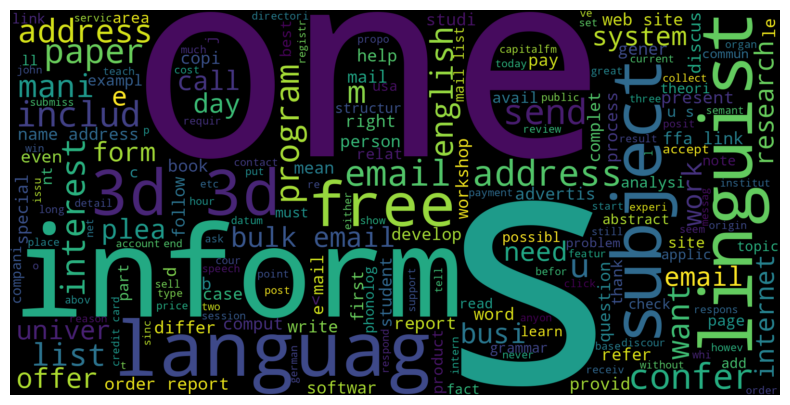

In [4]:
from wordcloud import WordCloud

text = dataframe_train["ContentCleaned"].str.cat(sep='\n') #combine EVERY SINGLE ROW OF TEXT into A SINGLE STRING.....
# print(text[:10000]) #just checking that it works lol

wordcloud = WordCloud(width=1600, height=800, random_state=42).generate(text) #make the word cloud with a high resolution to see lots of detail
plt.figure(figsize=(10,5)) #increase size of image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- The word cloud that looks through all types of email doesn't really provide any useful insight into patterns that emerge in specific types of email, so now I'll make a word cloud for each specific type of email: spam and ham.

### Spam:

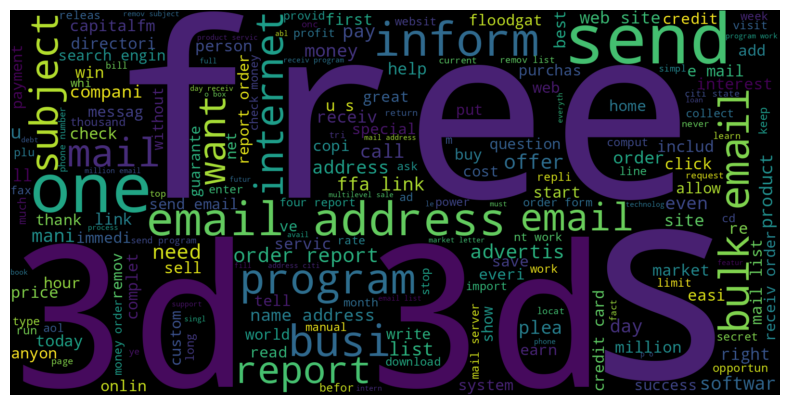

In [5]:
spam_dataframe = dataframe_train[dataframe_train.Spam == True]
text = spam_dataframe["ContentCleaned"].str.cat(sep='\n') #combine EVERY SINGLE ROW OF TEXT into A SINGLE STRING.....
# print(text[:10000]) #just checking that it works lol

spam_wordcloud = WordCloud(width=1600, height=800, random_state=42).generate(text) #make the word cloud with a high resolution to see lots of detail
plt.figure(figsize=(10,5)) #increase size of image
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Ham:

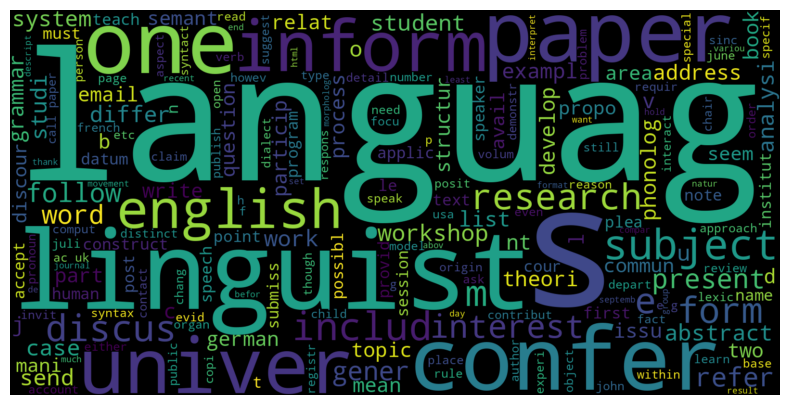

In [6]:
ham_dataframe = dataframe_train[dataframe_train.Spam == False]
text = ham_dataframe["ContentCleaned"].str.cat(sep='\n') #combine EVERY SINGLE ROW OF TEXT into A SINGLE STRING.....
# print(text[:10000]) #just checking that it works lol

ham_wordcloud = WordCloud(width=1600, height=800, random_state=42).generate(text) #make the word cloud with a high resolution to see lots of detail
plt.figure(figsize=(10,5)) #increase size of image
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- After creating the word cloud, it is easy to notice that words like "free", "one", "email", and "3d" appear more often in spam emails, while words like "language", "linguist", "universe", and "conference" appear more often in non spam emails.

# 4. Prepare the Data
- Lots of data prep was done in steps 2 and 3 due to the nature of the given data, so I will describe each of the data cleaning steps in more detail here.
- First, a test train split was made because in a real world scenario, you wouldn't be given clean input data and part of your deployment is that you would need to clean inputted data first, so I create a test train split early to ensure the test data stays messy so that once I create the deployment version of my model, it will need to clean any inputted test data as it would need to in a real scenario.
- Next, I clean the contents of the emails themselves. I first remove all the punctuations, then stem and lemmatize every word to ensure that there are as many similar words to each other as possible, which helps with data visualization as well as model accuracy. Also as a result of doing this process, the spaces between words becomes consistent.
- Finally, once this transformation is done, I make a new column with the cleaned version of the email contents. There isn't too much of a reason to keep the old data, but in most practices you would keep it anyway, so it doesn't really matter.

- Now comes the last data prep, which is CountVectorizing the words to see what words definitively appear most often.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

cv = CountVectorizer(decode_error='ignore')
X_train = cv.fit_transform(dataframe_train['ContentCleaned'])
Y_train = dataframe_train['Spam']
# print(cv.vocabulary_)

dict = cv.vocabulary_
df_list = [cv.vocabulary_.keys(),cv.vocabulary_.values()]

print(cv.vocabulary_.values())
# print(df_list)
# density_df = pd.DataFrame.from_dict(cv.vocabulary_) 
# density_df = pd.DataFrame(df_list, columns=['Words','Occurences'])
# print(density_df.head(10))

# mnb = MultinomialNB()
# mnb.fit(X_train,Y_train)
# print('training accuracy is --> ',mnb.score(X_train,Y_train)*100)


dict_values([16038, 3600, 15554, 14237, 9153, 3521, 14292, 14328, 8907, 5422, 6332, 6477, 16445, 6902, 10904, 15120, 8903, 771, 10535, 13687, 16932, 14026, 11336, 13756, 18222, 2837, 10328, 6133, 5705, 7443, 12732, 7529, 15121, 17930, 15398, 4936, 15886, 17042, 3476, 4134, 10741, 4082, 6162, 16972, 14772, 1623, 1312, 6600, 4185, 1807, 309, 9071, 12659, 5159, 16746, 7055, 9066, 1805, 1896, 8968, 11901, 13172, 12408, 2304, 1480, 11453, 6835, 10604, 3204, 2079, 2234, 10925, 5290, 4262, 17735, 11113, 2642, 5975, 4527, 15360, 1808, 1613, 12390, 8424, 12515, 6475, 16626, 16887, 4960, 13104, 2301, 8253, 5127, 15073, 12676, 5684, 5939, 10905, 14074, 15368, 10694, 11986, 9210, 13761, 13610, 7687, 15865, 4735, 17077, 17396, 16666, 18168, 3177, 5059, 16577, 13655, 7034, 13662, 10973, 4355, 3812, 6131, 5273, 12470, 7556, 7562, 8726, 16652, 17258, 11705, 7175, 5675, 10786, 77, 525, 6531, 2289, 17899, 13219, 78, 5686, 13991, 3827, 4679, 10269, 16441, 2351, 2353, 17624, 6078, 17515, 6156, 14116, 3893

# 5. Model the data
#### Models that I will try:
- Logistic regression
- Random forest regressor (rounding)
- Linear SVR (rounding)
#### The reason why I have resorted to rounding numerical models is because the data has like zero correlation so at this point its moreso just which one is luckier lmao
#### An issue I have is that since I couldn't find any correlations between any of the different attributes, I have no easy way to show how well the data fits since it doesn't really act straightforward for anything... I'm just using age because it seems to be the best despite having no real correlation ¯\\\_(ツ)\_/¯

#### Linear regression:

Mean Squared Error:  0.5999385873906532
Mean Absolute Error:  0.5446020776078934


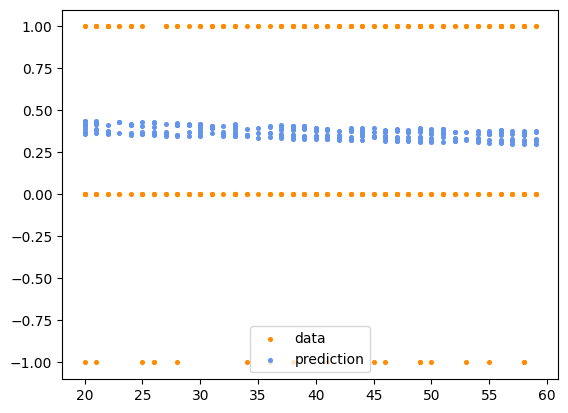

Mean Squared Error:  0.701209207126852
Mean Absolute Error:  0.49169435215946844


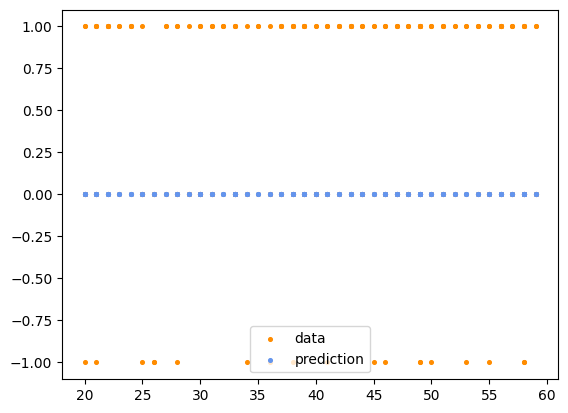

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #root of the average of the square of all differences
from sklearn.metrics import mean_absolute_error #all differences have equal weight (average without square)

lrg_model = LinearRegression()
lrg_model.fit(X_train,Y_train) #train model on test features (fitting the model)
lrg_purchased_predictions = lrg_model.predict(X_test)

#checks the predictions against the actual values
print('Mean Squared Error: ', mean_squared_error(Y_test, lrg_purchased_predictions, squared=False)) #~112k
print('Mean Absolute Error: ', mean_absolute_error(Y_test, lrg_purchased_predictions)) #~78k


plt.scatter(X_test.loc[:,"Age"], Y_test, color='darkorange',
            label='data',s=7)
plt.scatter(X_test.loc[:,"Age"], lrg_purchased_predictions, color='cornflowerblue',
         label='prediction',s=7)
plt.legend()
plt.show()


#that was just to show without rounding, heres the rounded version of the data
lrg_purchased_predictions_rounded = lrg_purchased_predictions.round(0)
print('Mean Squared Error: ', mean_squared_error(Y_test, lrg_purchased_predictions_rounded, squared=False))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, lrg_purchased_predictions_rounded))

plt.scatter(X_test.loc[:,"Age"], Y_test, color='darkorange',
            label='data',s=7)
plt.scatter(X_test.loc[:,"Age"], lrg_purchased_predictions_rounded, color='cornflowerblue',
         label='prediction',s=7)
plt.legend()
plt.show()
#side note, every single value rounded to 0 which I think is really funny

#### Random forest regressor:

Mean Squared Error:  0.6297979953526099
Mean Absolute Error:  0.5302657807308969


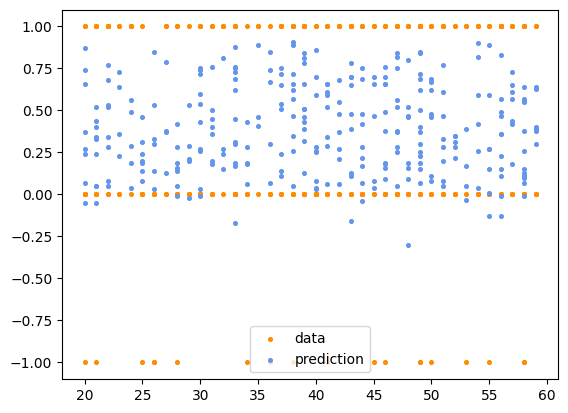

Mean Squared Error:  0.7581232291420598
Mean Absolute Error:  0.5415282392026578


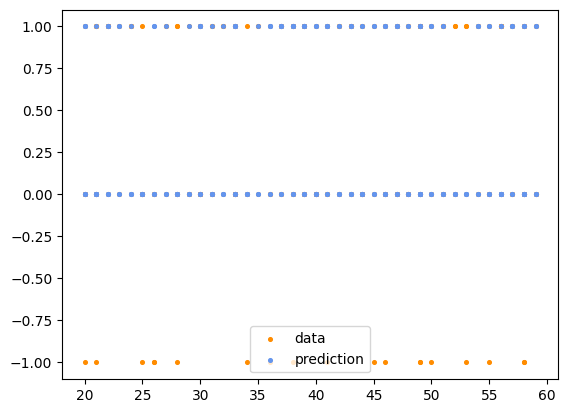

In [10]:
from sklearn.ensemble import RandomForestRegressor
 
rfr_model = RandomForestRegressor(n_estimators=100,random_state=0)
rfr_model.fit(X_train, Y_train)
rfr_purchased_predictions = rfr_model.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(Y_test, rfr_purchased_predictions, squared=False))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, rfr_purchased_predictions))


plt.scatter(X_test.loc[:,"Age"], Y_test, color='darkorange',
            label='data',s=7)
plt.scatter(X_test.loc[:,"Age"], rfr_purchased_predictions, color='cornflowerblue',
         label='prediction',s=7)
plt.legend()
plt.show()


#that was just to show without rounding, heres the rounded version of the data
rfr_purchased_predictions_rounded = rfr_purchased_predictions.round(0)
print('Mean Squared Error: ', mean_squared_error(Y_test, rfr_purchased_predictions_rounded, squared=False))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, rfr_purchased_predictions_rounded))

plt.scatter(X_test.loc[:,"Age"], Y_test, color='darkorange',
            label='data',s=7)
plt.scatter(X_test.loc[:,"Age"], rfr_purchased_predictions_rounded, color='cornflowerblue',
         label='prediction',s=7)
plt.legend()
plt.show()

#### Logistic regression:

Mean Squared Error:  0.7106218324146246
Mean Absolute Error:  0.4983388704318937


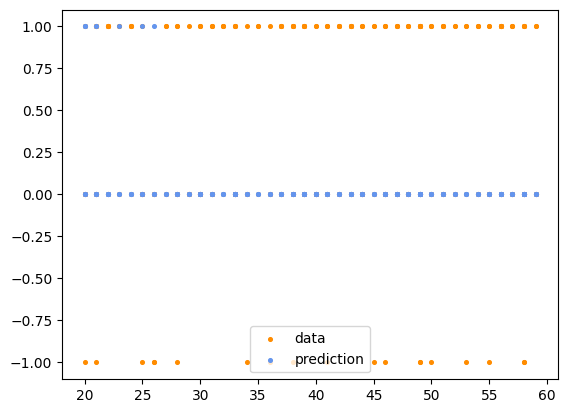

In [11]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, Y_train)
logreg_model_predictions = logreg_model.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(Y_test, logreg_model_predictions, squared=False))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, logreg_model_predictions))


plt.scatter(X_test.loc[:,"Age"], Y_test, color='darkorange',
            label='data',s=7)
plt.scatter(X_test.loc[:,"Age"], logreg_model_predictions, color='cornflowerblue',
         label='prediction',s=7)
plt.legend()
plt.show()

# 6. Fine Tune the Model

- There isn't really anything to fine tune, everything that needed to be done is done
#### After looking through the RMSEs/MAEs and also the graphs (not really tbh, as aforementioned they kinda suck), it seems like the best choice of a model is linear regression rounded.
#### YES, THE MODEL THAT ROUNDS TO ALL ZEROS IS THE MOST ACCURATE!! really proves that there truly isn't any (reasonable) correlation (at least not that I could find with my skill)

# 7. Present the solution
- First, I imported my data and removed columns of data that are useless
- Then, I visualized the data to see what correlated most with the purchasing probability (nothing was really found to correlate, so for all future plotting needs I just used age)
- Then, I split the data into a test and train set, and then tried fitting 3 different models to see which would give the best results
- Then, I decided on the model that was best at predicting the data primarily based on RMSE/MAE and maybe some of the plotting data (didn't really use the plotted data since there was no found correlation)
- Finally, deploy the chosen model to a file for usage elsewhere
#### THE CHOSEN MODEL WAS LINEAR REGRESSION ROUNDED TO THE CLOSEST WHOLE INTEGER

# 8. Launch the Model System
- Pickle the model to be loaded whenever needed
- Unfortunately the pickled file cannot be run alone, the function below MUST be used since it rounds the values which is something the model doesn't do on its own


In [12]:
#Save the model
import pickle

pickle.dump(lrg_model, open('lrg_model.pkl', 'wb'))

### RUN THE CELL BELOW AND INPUT GENDER, AGE, AND ESTIMATEDSALARY

In [17]:
## FINAL FUNCTION THAT DOES EVERYTHING
import pickle
lrg_model_loaded = pickle.load(open('lrg_model.pkl', 'rb'))

def predict(Gender: str, Age: int, EstimatedSalary: int):
    if Gender == "Female":
        Gender_Female = True
        Gender_Male = False
    elif Gender == "Male":
        Gender_Female = False
        Gender_Male = False
        
    params = [[Age, EstimatedSalary, Gender_Female, Gender_Male]]
    predict_df = pd.DataFrame(params, columns=['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male'])
    predicted_value = lrg_model_loaded.predict(predict_df)
    rounded_predicted_value = predicted_value[0].round(0)
    return(rounded_predicted_value)

gender = input("Gender (\"Male\" or \"Female\"): ")
age = int(input("Age:"))
salary = int(input("Estimated salary: "))

             
ret = predict(gender, age, salary)
verdict = ""
if ret == -1:
    verdict = "Returned"
elif ret == 0:
    verdict = "Not Purchased"
elif ret == 1:
    verdict = "Purchased"
else:
    verdict = "Your Model is Severely Broken and heres what you got: " + str(ret)
print("The predicted verdict is: " + verdict + " (" + str(ret) + ")")

Gender ("Male" or "Female"):  Male
Age: 23
Estimated salary:  123456


The predicted verdict is: Not Purchased (0.0)


- I just wanna advise that most (realistic) input is always gonna output 0. Simply put, linear regression always ends up giving a positive value less than 0.5, causing it to round to 0 every time. It still ended up being the most accurate by quite a lot. Statistically, its best to just always round to zero I guess...
- Also just to be transparent: if anything seems weird like a comment is referring to something that doesn't make sense in the context of this data/model, it's likely because I copied from my last project to save time and didn't change it (hopefully nothing is like that though)